### 전국 신규 민간 아파트 분양가격 동향

In [2]:
## 경고 메시지 무시하기
import warnings

warnings.filterwarnings('ignore')

#### 필요 라이브러리 모듈 임포트

In [3]:
import pandas as pd
import numpy as np
import re                   ## 정규식 쓸 줄 압니까?
import missingno as msno

In [4]:
## 한글 깨짐현상
import matplotlib
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 한글깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 사용시 마이너스 깨짐현상 해결

##### 전국 평균 분양가격 불러오기

- 공공데이터 포털
    - https://www.data.go.kr/data/15061057/fileData.do

In [5]:
# pre_sale = pd.read_csv('..  data/전국_평균_분양가격(2018.7월).csv', encoding='euc-kr')
pre_sale = pd.read_csv('../Datas/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20230630.csv', encoding='utf-8')

##### 데이터 확인

In [6]:
pre_sale.shape

(7905, 5)

In [7]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [8]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


In [9]:
pre_sale.dtypes

지역명           object
규모구분          object
연도             int64
월              int64
분양가격(제곱미터)    object
dtype: object

In [10]:
## 널값 확인
pre_sale.isnull().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    547
dtype: int64

<Axes: >

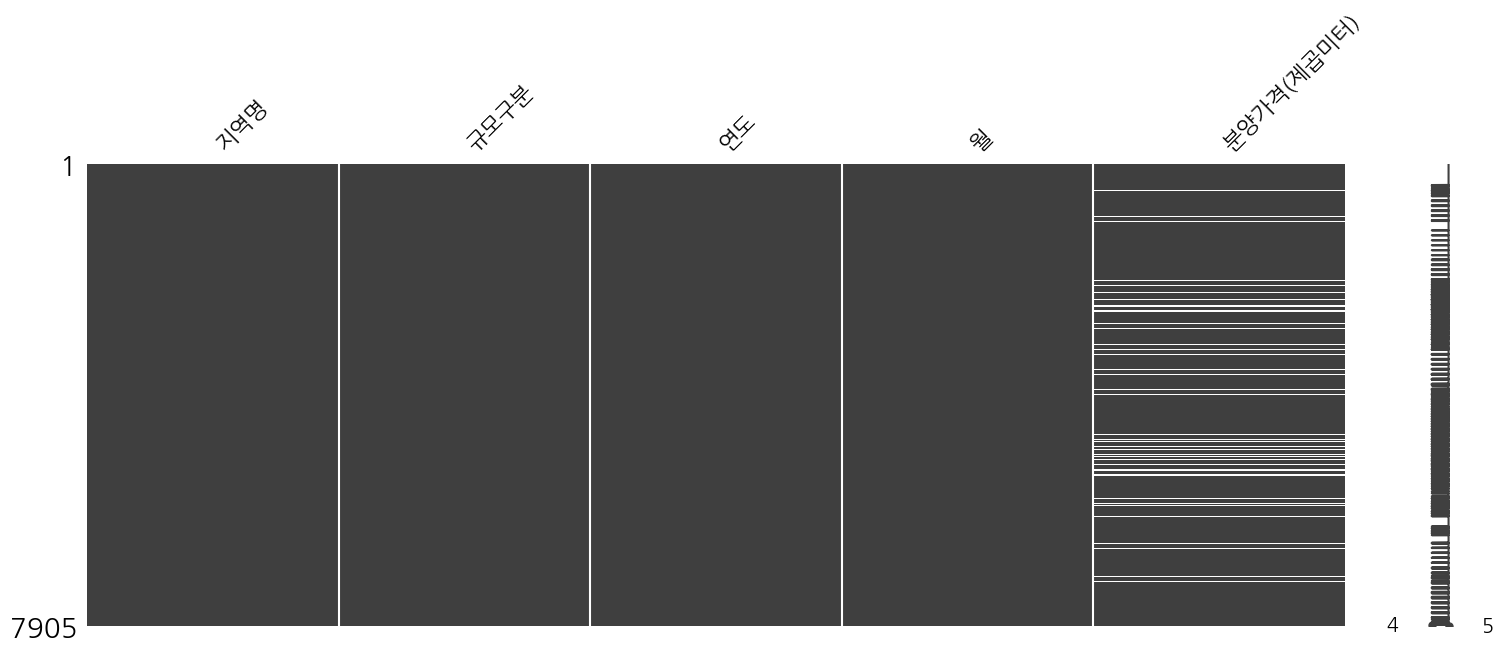

In [11]:
msno.matrix(pre_sale, figsize=(18, 6))

In [12]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경 
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [13]:
pre_sale_price = pre_sale['분양가격(제곱미터)']

In [14]:
## 시리즈 변수 확인
pre_sale_price

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
7900    7326
7901    7381
7902    7084
7903    6639
7904    7506
Name: 분양가격(제곱미터), Length: 7905, dtype: object

In [15]:
## 분양가격의 타입을 숫자로 변경
## errors='ignore/raise/coerce' 
    ## errors = 'ignore' -> 만약 숫자로 변경할 수 없는 데이터라면 숫자로 변경하지 않고 원본 데이터를 그대로 반환
    ## errors = 'coerce' -> 만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환
    ## errors = 'raise' -> 만약 숫자로 변경할 수 없는 데이터라면 에러를 일으키며 코드를 중단
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')

In [16]:
## 평당 분양가격을 구하기
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [17]:
## 요약
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         7905 non-null   object 
 1   규모구분        7905 non-null   object 
 2   연도          7905 non-null   object 
 3   월           7905 non-null   object 
 4   분양가격(제곱미터)  7358 non-null   object 
 5   분양가격        7322 non-null   float64
 6   평당분양가격      7322 non-null   float64
dtypes: float64(2), object(5)
memory usage: 432.4+ KB


In [18]:
pre_sale.isnull().sum()     # 결측치 확인

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    547
분양가격          583
평당분양가격        583
dtype: int64

In [19]:
pre_sale.describe()  # float데이터 요약(단위: 천원)

,분양가격,평당분양가격
count,7322.000000,7322.000000
mean,3723.138214,12286.356105
std,1533.511206,5060.586978
min,1868.000000,6164.400000
25%,2675.250000,8828.325000
50%,3273.000000,10800.900000
75%,4295.750000,14175.975000
max,13835.000000,45655.500000


In [20]:
pre_sale.describe(include=[np.object])  # object타입의 데이터요약 (top은 랜덤값)

,지역명,규모구분,연도,월,분양가격(제곱미터)
count,7905,7905,7905,7905,7358
unique,17,5,9,12,2766
top,서울,모든면적,2016,10,
freq,465,1581,1020,680,31


In [21]:
# 2022년 데이터 조회 (연도 데이터타입='str')
pre_sale_2022 = pre_sale.loc[pre_sale['연도'] == '2022']
pre_sale_2022.shape  # (행, 열)

(1020, 7)

In [22]:
## 같은 값을 가지고 시도별로 동일하게 데이터가 들어 있는 것을 확인 가능
pre_sale['규모구분'].value_counts()

모든면적                       1581
전용면적 60제곱미터이하              1581
전용면적 60제곱미터초과 85제곱미터이하     1581
전용면적 85제곱미터초과 102제곱미터이하    1581
전용면적 102제곱미터초과             1581
Name: 규모구분, dtype: int64

In [23]:
pre_sale['지역명'].value_counts()

서울    465
강원    465
경남    465
경북    465
전남    465
전북    465
충남    465
충북    465
세종    465
인천    465
울산    465
대전    465
광주    465
대구    465
부산    465
경기    465
제주    465
Name: 지역명, dtype: int64

#### 전국평균 분양가격

- groupby와 pivot_table 활용하기

In [24]:
# 현재 분양가격, 평균분양가격만 숫자타입.
# 분양가격만 봤을때 2015년에서 2018년으로 갈수록 올라가는것을 확인할 수 있다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T   # Transpose (행과 열 바꾸기)   # describe(): 기본= 숫자타입만

연도             2015   2016   2017   2018   2019   2020   2021   2022   2023
분양가격   count    243    984    975    919    912    882    945    979    483
       mean   2,789  2,934  3,143  3,327  3,693  3,951  4,132  4,528  4,932
       std      977  1,071  1,111  1,186  1,563  1,633  1,568  1,522  1,682
       min    1,868  1,900  1,976  2,076  2,124  2,297  2,409  2,657  2,785
       25%    2,225  2,282  2,373  2,525  2,636  2,780  3,057  3,284  3,625
       50%    2,516  2,672  2,838  2,952  3,395  3,734  3,858  4,189  4,659
       75%    3,026  3,148  3,466  3,698  4,066  4,441  4,539  5,232  5,756
       max    7,092  8,096  7,887  8,098 12,728 13,835 10,746 10,322 11,911
평당분양가격 count    243    984    975    919    912    882    945    979    483
       mean   9,203  9,683 10,373 10,979 12,188 13,039 13,636 14,943 16,277
       std    3,224  3,536  3,665  3,914  5,159  5,388  5,173  5,022  5,549
       min    6,164  6,270  6,521  6,851  7,009  7,580  7,950  8,768  9,190
       25%    7,342  7,531  7,831  8,332  8,697  9,176 10,088 10,839 11,962
       50%    8,303  8,818  9,365  9,742 11,204 12,324 12,731 13,824 15,375
       75%    9,984 10,390 11,438 12,203 13,419 14,655 14,979 17,264 18,995
       max   23,404 26,717 26,027 26,723 42,002 45,656 35,462 34,063 39,306

##### 규모별 전국 평균 분양가격

- pivot_table(values, index, columns, ...)

In [25]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')   # values, index, columns

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
규모구분,,,,,,,,,
모든면적,"8,893","9,293","9,927","10,676","11,603","12,318","13,707","14,690","15,919"
전용면적 102제곱미터초과,"9,837","10,389","11,311","11,446","13,332","14,068","14,381","15,991","17,273"
전용면적 60제곱미터이하,"8,952","9,399","10,271","10,844","11,507","12,401","12,984","13,948","16,231"
전용면적 60제곱미터초과 85제곱미터이하,"8,892","9,296","9,840","10,651","11,677","12,327","13,644","14,695","15,673"
전용면적 85제곱미터초과 102제곱미터이하,"9,519","10,122","10,573","11,442","12,981","14,760","13,532","15,523","16,378"


##### 전국 분양가 변동금액

- 규모구분이 **모든면적**으로 되어있는 금액으로 연도별 변동금액을 조회

In [26]:
# 규모구분에서 모든면적으로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '모든면적']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,강원,"7,160","7,011","7,171","7,681","8,142","9,331","9,717","10,929","12,776"
1,경기,"10,377","11,220","11,841","13,186","14,469","14,383","14,183","16,312","18,393"
2,경남,"7,586","7,848","8,164","9,019","9,871","10,161","10,505","11,724","11,807"
3,경북,"7,171","7,361","7,803","8,505","8,857","9,545","10,333","11,606","12,500"
4,광주,"8,052","8,899","9,471","9,856","11,823","12,500","14,021","15,148","17,033"
5,대구,"9,232","10,310","11,507","12,076","13,852","15,145","15,558","16,508","17,206"
6,대전,"8,098","8,502","9,056","10,180","11,778","11,094","11,914","14,010","15,856"
7,부산,"10,307","10,430","11,664","12,998","13,116","13,248","14,646","17,918","19,643"
8,서울,"19,725","20,663","21,425","22,889","26,131","26,910","30,115","29,648","30,890"
9,세종,"8,750","8,860","9,133","10,355","11,079","11,355","12,561","11,397","12,279"


In [27]:
region_year['변동액'] = (region_year['2023'] - region_year['2015']).astype(int)
print( region_year['변동액'] )
max_delta_price = np.max(region_year['변동액'])*1000    # 평균값의 최대값
min_delta_price = np.min(region_year['변동액'])*1000    # 평균값의 최소값
mean_delta_price = np.mean(region_year['변동액'])*1000  # 평균값의 평균값

0      5616
1      8015
2      4221
3      5329
4      8981
5      7973
6      7758
7      9336
8     11164
9      3528
10     8172
11     5954
12     4665
13     4033
14    16144
15     4567
16     3971
Name: 변동액, dtype: int32


In [28]:
region_year

연도,지역명,2015,2016,2017,2018,2019,2020,2021,2022,2023,변동액
0,강원,"7,160","7,011","7,171","7,681","8,142","9,331","9,717","10,929","12,776",5616
1,경기,"10,377","11,220","11,841","13,186","14,469","14,383","14,183","16,312","18,393",8015
2,경남,"7,586","7,848","8,164","9,019","9,871","10,161","10,505","11,724","11,807",4221
3,경북,"7,171","7,361","7,803","8,505","8,857","9,545","10,333","11,606","12,500",5329
4,광주,"8,052","8,899","9,471","9,856","11,823","12,500","14,021","15,148","17,033",8981
5,대구,"9,232","10,310","11,507","12,076","13,852","15,145","15,558","16,508","17,206",7973
6,대전,"8,098","8,502","9,056","10,180","11,778","11,094","11,914","14,010","15,856",7758
7,부산,"10,307","10,430","11,664","12,998","13,116","13,248","14,646","17,918","19,643",9336
8,서울,"19,725","20,663","21,425","22,889","26,131","26,910","30,115","29,648","30,890",11164
9,세종,"8,750","8,860","9,133","10,355","11,079","11,355","12,561","11,397","12,279",3528


In [29]:
max_delta_price

16144000

In [30]:
min_delta_price

3528000

In [31]:
print('1. 2015~2023년까지 분양가는 계속상승했음. 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다'.format(max_delta_price))

1. 2015~2023년까지 분양가는 계속상승했음. 상승액이 가장 큰 지역은 제주이며 상승액은 평당 16,144,000원이다


In [32]:
print('2. 상승액이 가장 작은 지역은 세종이며, 평당 {:,.0f}원이다.'.format(min_delta_price))

2. 상승액이 가장 작은 지역은 세종이며, 평당 3,528,000원이다.


In [33]:
print('4. 전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

4. 전국 평균 변동액은 평당 7,025,118원이다.


#### 시각화
- pandas, seaborn

##### 연도별 변동 그래프
- 공공데이터포털에서 제공하고 있는 평균 분양가격을 연도, 지역별로 그려봄
- 폰트 설정을 위해 Matplotlib의 환경설정에서 한글폰트 설정이 필요.

In [34]:
import seaborn as sns
sns.set_style('whitegrid')    # 숫자를 따라 하얀 선 생김 

##### 막대그래프
- 바 차트, 바 그래프 라고도 불림.
- 주로 범주형 데이터를 표현하는 차트나 그래프

In [35]:
import matplotlib.pyplot as plt

In [36]:
## 한글 깨짐현상
import matplotlib
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 한글깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 사용시 마이너스 깨짐현상 해결

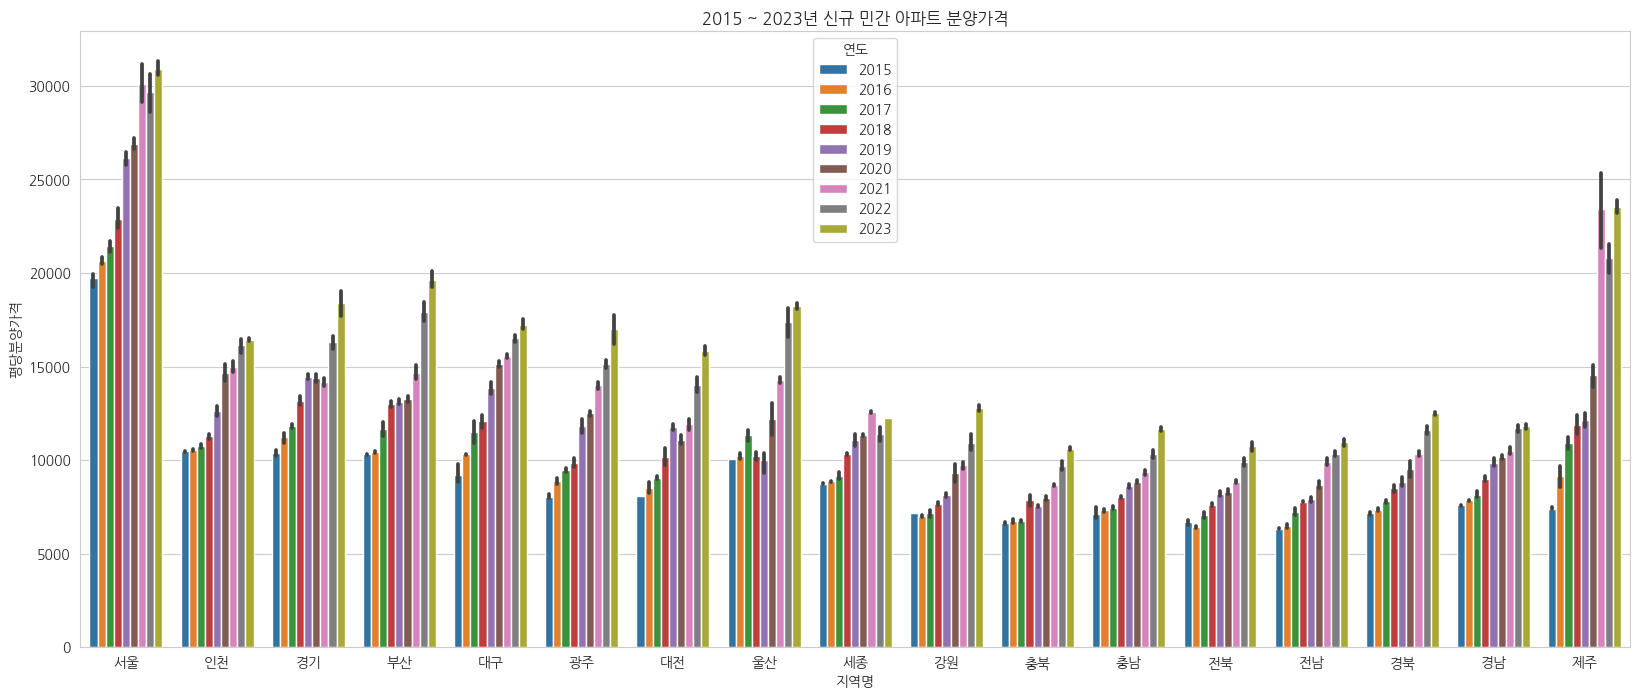

In [37]:
plt.figure(figsize=(20, 8))
plt.title('2015 ~ 2023년 신규 민간 아파트 분양가격')
sns.barplot(data=region_year_all, x='지역명', y='평당분양가격', hue='연도')    # x축, y축, 막대

plt.show()

In [38]:
# 피벗테이블
# pandas로 시각화 하기위해 적합한 형태로 데이터를 변형해야한다.
df_year_region = pd.pivot_table(region_year_all, index=['지역명'], columns='연도', values='평당분양가격')
df_year_region.sample(3)    # 랜덤하게 샘플 3개만 뽑아오도록

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역명,,,,,,,,,
충남,"7,115","7,331","7,456","8,013","8,607","8,856","9,346","10,329","11,682"
서울,"19,725","20,663","21,425","22,889","26,131","26,910","30,115","29,648","30,890"
전북,"6,703","6,418","7,075","7,626","8,197","8,317","8,838","9,886","10,737"


In [39]:
df_year_region.columns

Index(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], dtype='object', name='연도')

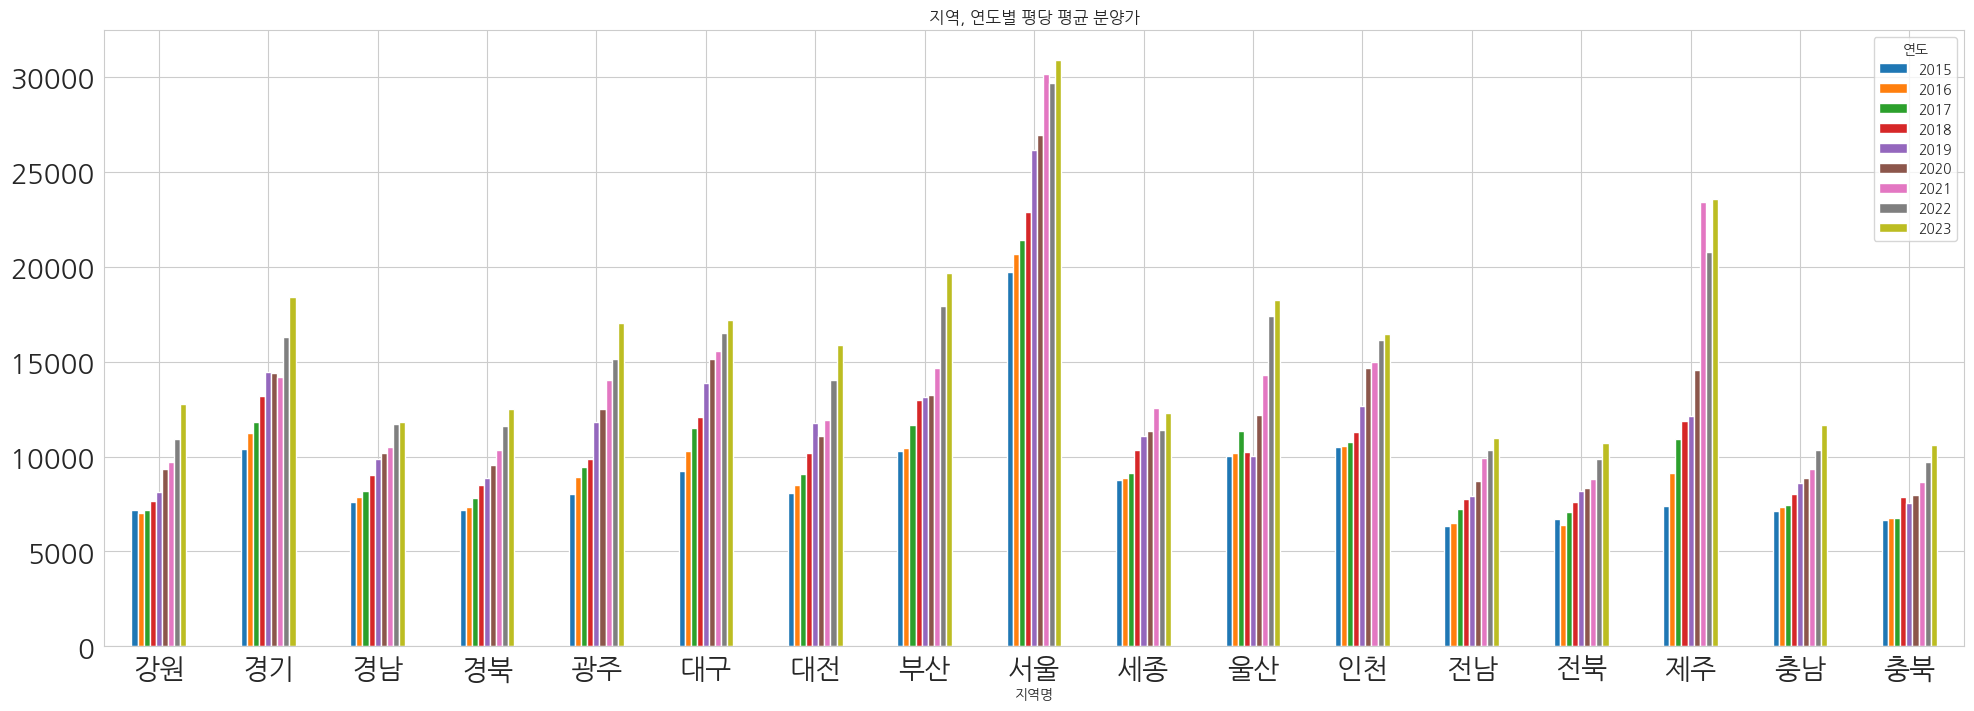

In [40]:
df_year_region.plot.bar(figsize=(24, 8), grid=True, fontsize=20, rot=0, title="지역, 연도별 평당 평균 분양가")
# 기본형태 : df_year_region.plot.bar()
# rot = 0 : 회전할 각도 (없으면, 지역명이 세로로 나온다.)
plt.show()

##### 규모별
- seaborn의 barplot은 기본값을 평균으로 구한다.
- seaborn의 barplot의 옵션 중 ci(confidence interval)는 신뢰구간을 의미하며, 기본값은 95이다.
- 표본의 95%의 데이터가 (막대 상단의) 검은색 선 안에 위치하고 있음을 확인할 수 있다.
- 나머지 5%는 이 표본을 벗어나는 데이터로 너무 크거나 작은 데이터를 제외하고 볼 수 있다.

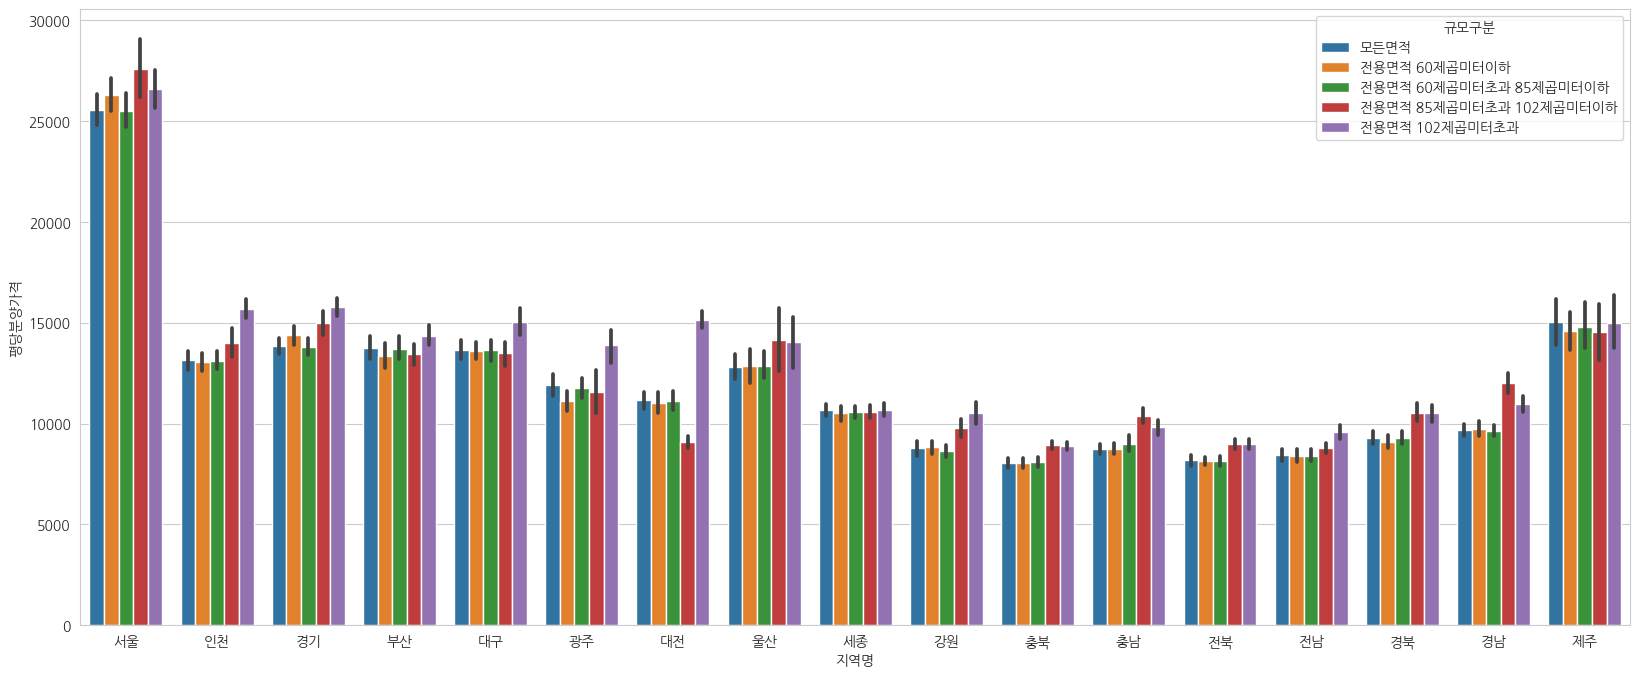

In [41]:
plt.figure(figsize=(20, 8))
sns.barplot(data=pre_sale, x='지역명', y='평당분양가격', hue='규모구분')

plt.show()

##### 지역별 평당 분양가격 합계
- 아래 데이터로 규모(제곱미터)에 따른 평당 분양가격을 봅니다.

In [42]:
pre_sale_size = pre_sale.pivot_table('평당분양가격', '지역명', '규모구분')     # values, index, columns
pre_sale_size.sample(3)

규모구분,모든면적,전용면적 102제곱미터초과,전용면적 60제곱미터이하,전용면적 60제곱미터초과 85제곱미터이하,전용면적 85제곱미터초과 102제곱미터이하
지역명,,,,,
경남,"9,689","10,968","9,750","9,642","12,009"
경북,"9,297","10,524","9,104","9,270","10,539"
충북,"8,038","8,888","8,038","8,078","8,928"


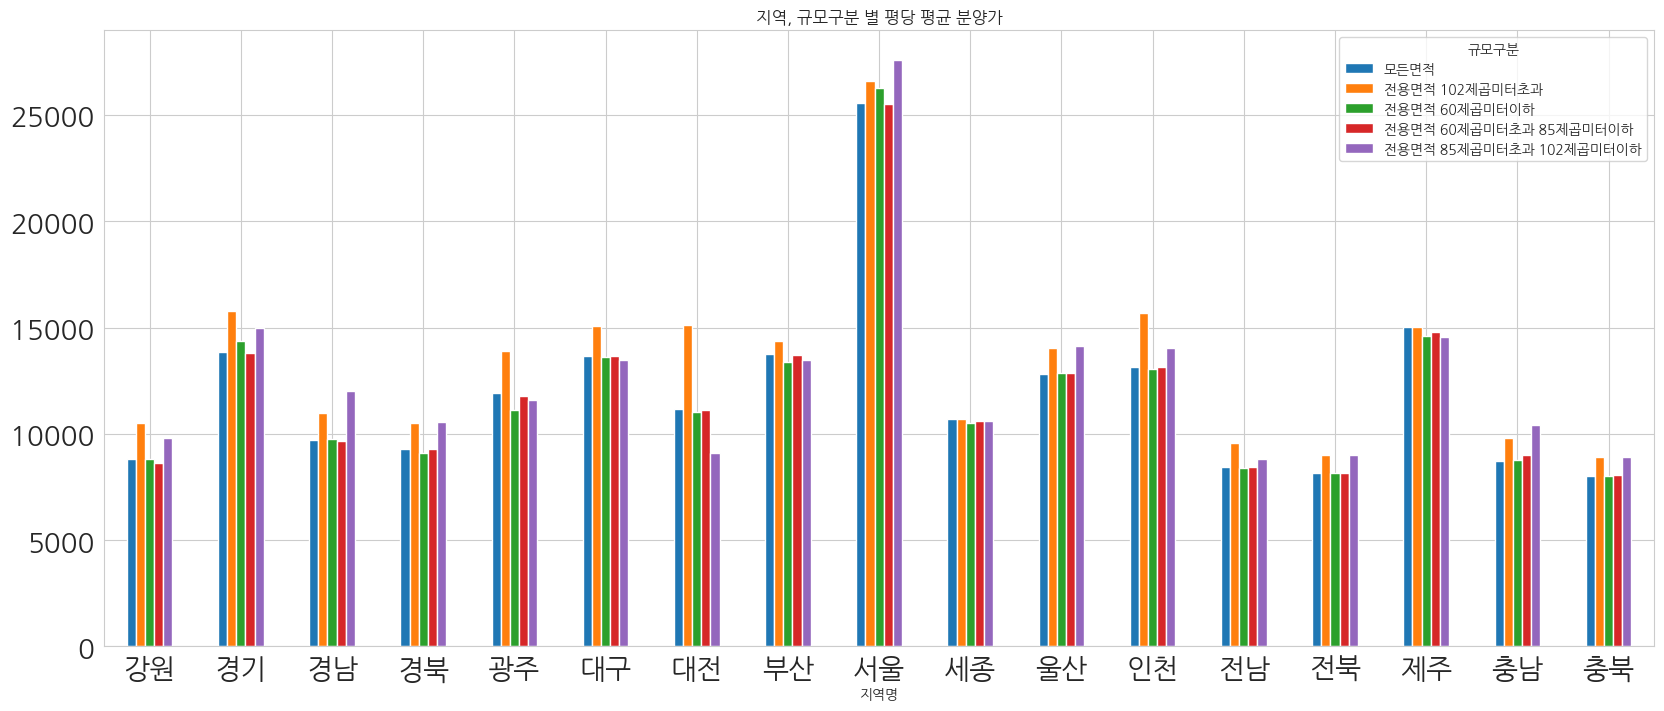

In [43]:
pre_sale_size.plot.bar(title='지역, 규모구분 별 평당 평균 분양가', figsize=(20, 8), grid=True, fontsize=20, rot=0)

plt.show()

In [44]:
## 광주, 대전에 결측치 많음
pre_sale[ (pre_sale['지역명'] == '광주') &  (pre_sale["규모구분"] == '전용면적 102제곱미터초과') ]

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당분양가격
29,광주,전용면적 102제곱미터초과,2015,10,,NaN,NaN
114,광주,전용면적 102제곱미터초과,2015,11,,NaN,NaN
199,광주,전용면적 102제곱미터초과,2015,12,,NaN,NaN
284,광주,전용면적 102제곱미터초과,2016,1,,NaN,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7509,광주,전용면적 102제곱미터초과,2023,2,5724,"5,724","18,889"
7594,광주,전용면적 102제곱미터초과,2023,3,5724,"5,724","18,889"
7679,광주,전용면적 102제곱미터초과,2023,4,5724,"5,724","18,889"
7764,광주,전용면적 102제곱미터초과,2023,5,7561,"7,561","24,951"


##### 전국 규모(면적)별 신규 민간 아파트 분양가격

In [45]:
pre_sale.sample()

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당분양가격
4220,충남,모든면적,2019,11,2602,"2,602","8,587"


In [46]:
pre_sale[['지역명', '평당분양가격', '규모구분']].sample(3)

,지역명,평당분양가격,규모구분
5080,전남,"8,854",모든면적
2754,대전,NaN,전용면적 102제곱미터초과
2245,울산,"10,435",모든면적


In [47]:
pre_sale.shape    # 행,열

(7905, 7)

In [48]:
# 결축치 개수를 확인합니다.
pre_sale['평당분양가격'].isnull().sum()

583

In [49]:
# 결축치가 있으면 제대로 된 시각화를 할 수 없기 때문에 drop
pre_sale['평당분양가격'].dropna(inplace=True, axis=0)    # axis=0 : row를 기준으로 drop
                                                          # axis=1: column을 기준으로 drop

In [50]:
pre_sale.dropna(axis=0, inplace=True)

In [51]:
# 결축치가 없습니다.
pre_sale['평당분양가격'].isnull().sum()

0

In [52]:
pre_sale.shape

(7322, 7)

In [53]:
pre_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)     object
분양가격          float64
평당분양가격        float64
dtype: object

In [54]:
# 평당분양가격을 int형 으로 변환
pre_sale['평당분양가격'] = pre_sale['평당분양가격'].astype(int)

In [55]:
# 혹시 아직도 결측치가 남아있는지 확인 
pre_sale[pre_sale['평당분양가격'] == 0]

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당분양가격


In [56]:
pre_sale['규모구분'].unique()    # 중복이 제거된 값만 나온다

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [57]:
pre_sale_size.sample(3)

규모구분,모든면적,전용면적 102제곱미터초과,전용면적 60제곱미터이하,전용면적 60제곱미터초과 85제곱미터이하,전용면적 85제곱미터초과 102제곱미터이하
지역명,,,,,
대전,"11,160","15,138","11,035","11,112","9,078"
전남,"8,443","9,577","8,403","8,417","8,808"
충북,"8,038","8,888","8,038","8,078","8,928"


##### box-and-whisker plot (상자 수염 그림)

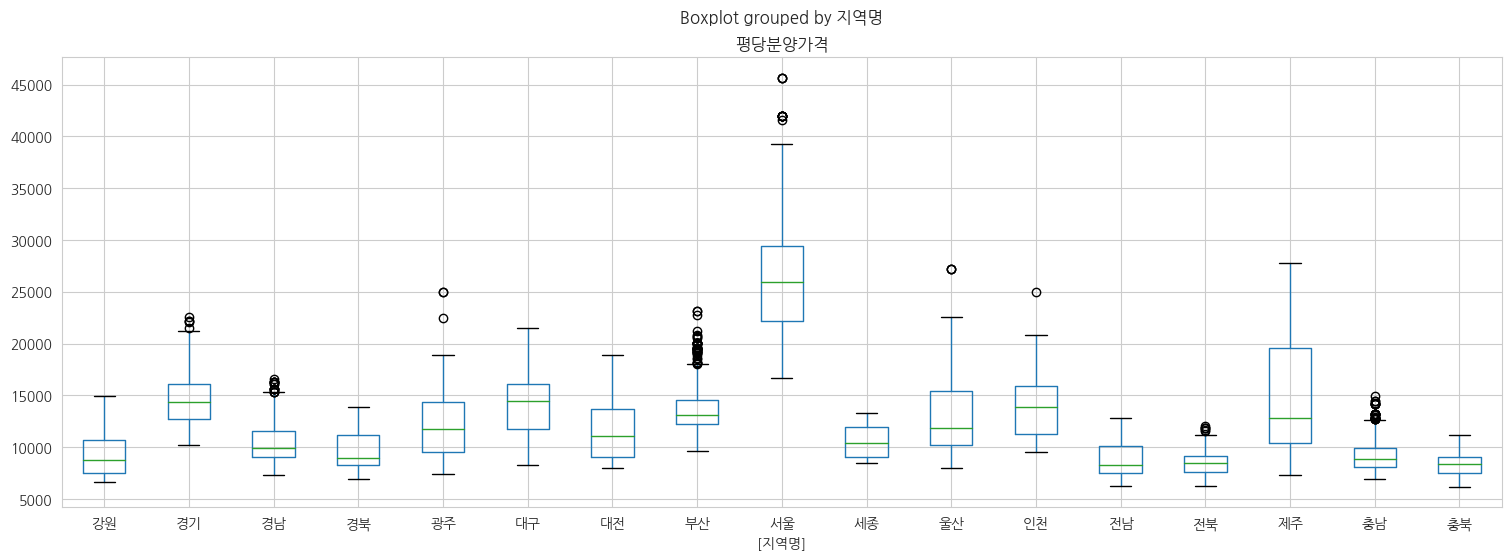

In [58]:
# 아래 그래프를 통해 지역마다 0값이 존재하는 것으로 결축치가 있음을 확인할 수 있다.
pre_sale[['지역명', '평당분양가격']].boxplot(by=['지역명'], figsize=(18, 6))     # y축: 평균평당분양가격, x축: 지역명 

plt.show()

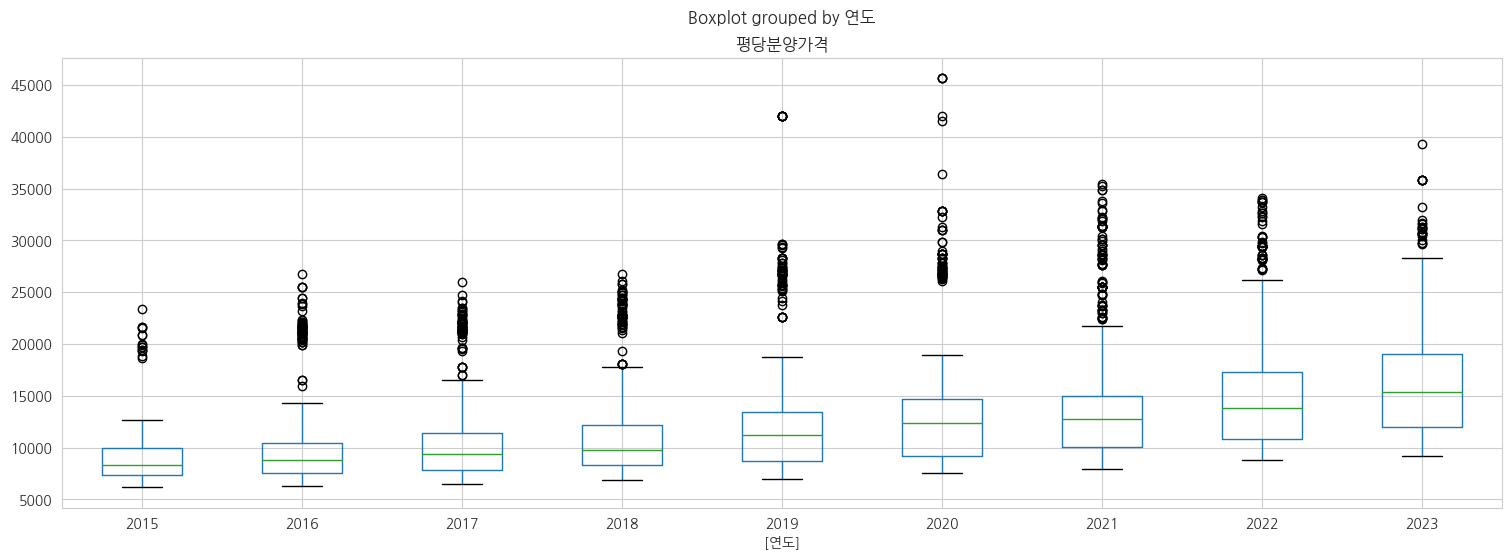

In [59]:
pre_sale[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(18, 6))

plt.show()

In [60]:
pre_sale_seoul = pre_sale[pre_sale['지역명'] == '서울']

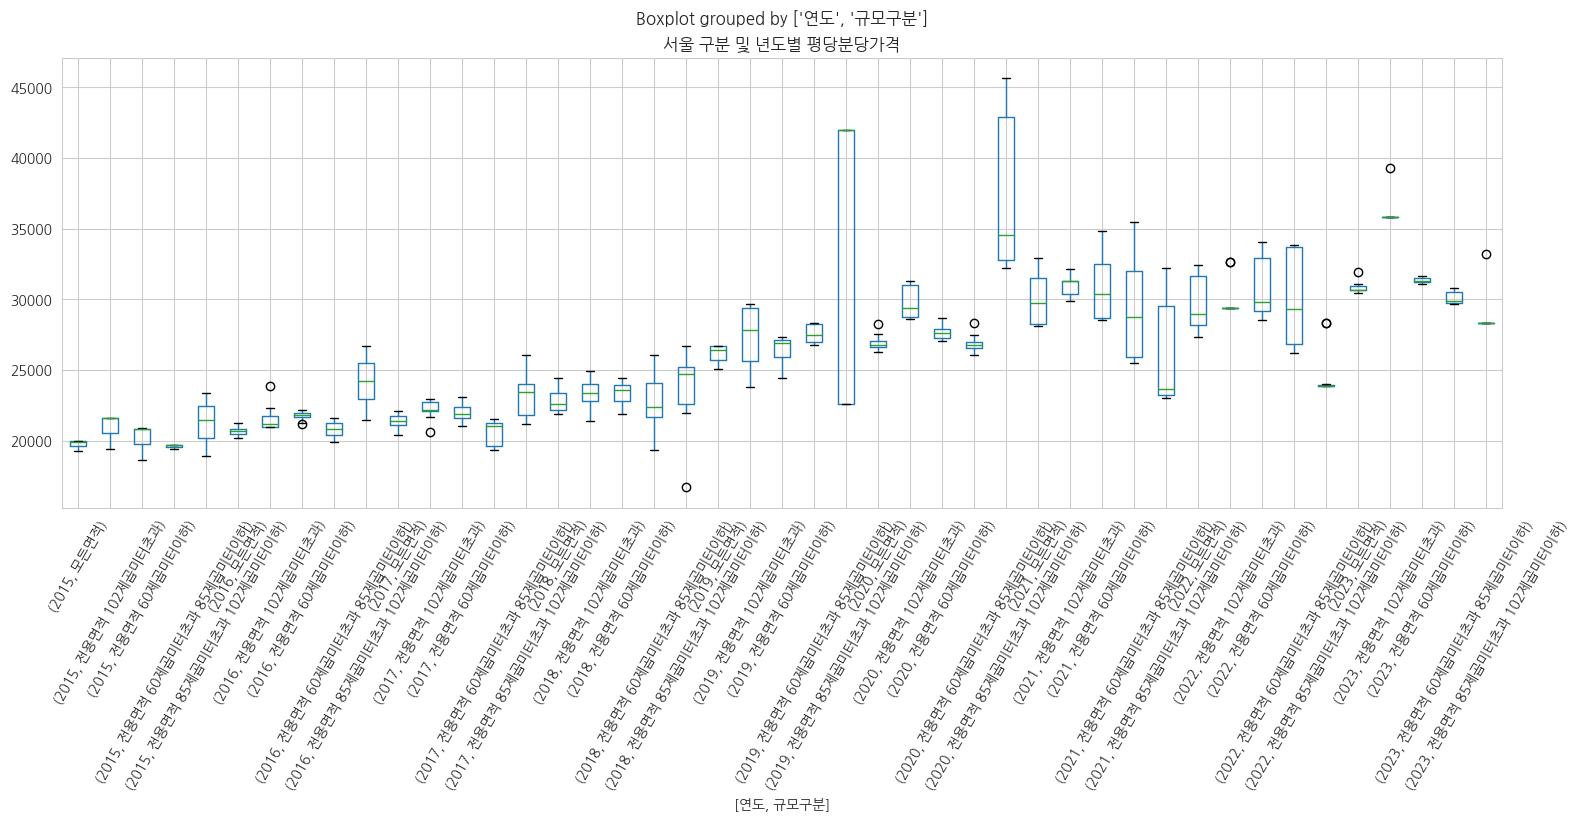

In [61]:
pre_sale_seoul[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18, 6),
    rot=60)   # 회전각 60도

plt.title('서울 구분 및 년도별 평당분당가격')
plt.show()

In [62]:
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']

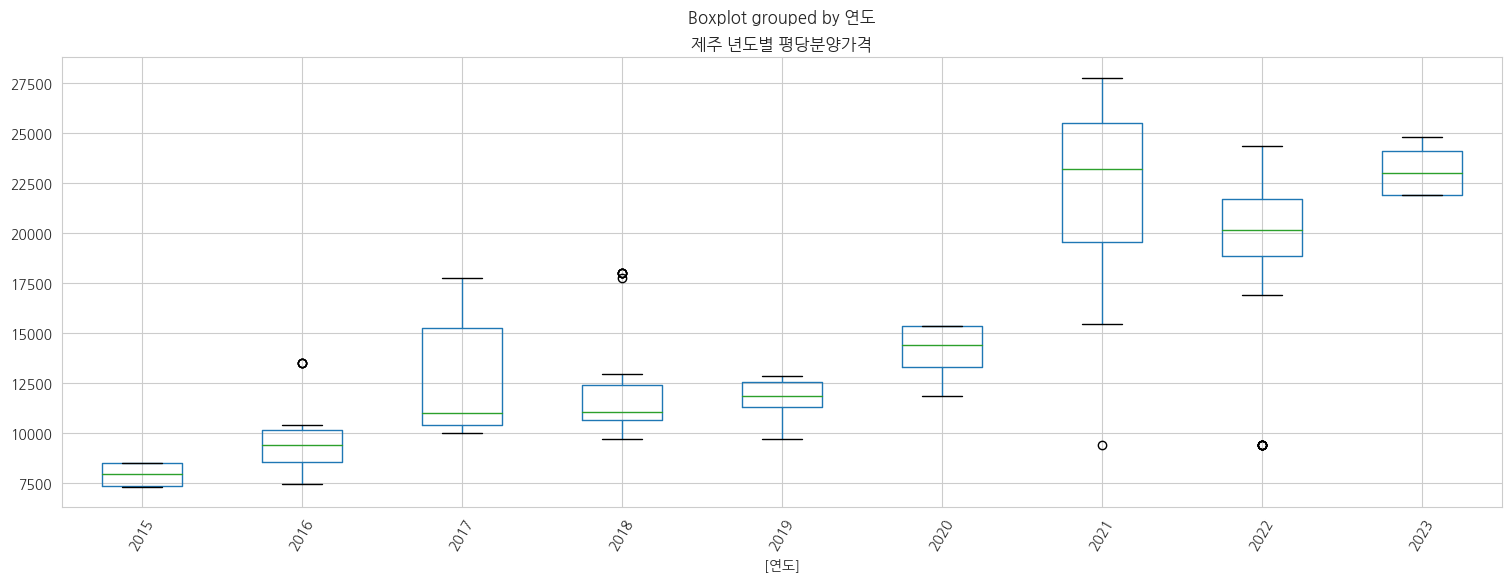

In [63]:
pre_sale_jeju[['연도','평당분양가격']].boxplot(
    by=['연도'],
    figsize=(18, 6),
    rot=60)   # 회전각 60도

plt.title('제주 년도별 평당분양가격')
plt.show()

In [64]:
pre_sale_jeju.isnull().sum()   # 결측치 개수

지역명           0
규모구분          0
연도            0
월             0
분양가격(제곱미터)    0
분양가격          0
평당분양가격        0
dtype: int64

### 공공데이터 상권정보 분석

#### 상권별 업종밀집 통계

- 상권정보 공공데이터 포털
    - https://www.data.go.kr/data/15083033/fileData.do

In [65]:
shop = pd.read_csv('../Datas/소상공인시장진흥공단_상권정보_부산_202306.csv', encoding='utf-8')
shop.shape

(153531, 39)

In [66]:
shop.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0072343,선해횟집,NaN,I2,음식,I201,한식,I20111,횟집,I56111,...,2641011100100300027023409,NaN,부산광역시 금정구 사천로3번길 2,609808,46264,NaN,1,NaN,129,35
1,MA010120220805430802,미즈노,NaN,G2,소매,G209,섬유·의복·신발 소매,G20905,기타 의류 소매업,G47419,...,2635010500114960000000001,롯데백화점센텀시티점,부산광역시 해운대구 센텀남대로 59,612022,48058,NaN,5,NaN,129,35
2,MA010120220805430814,리스트,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,...,2644010400134380000000001,스타필드시티명지점,부산광역시 강서구 명지국제6로 168,618200,46772,NaN,2,NaN,129,35
3,MA010120220805430900,눈썹그리기교실동안눈썹,NaN,S2,수리·개인,S207,이용·미용,S20702,피부 관리실,S96113,...,2632010200122720005015331,현호타워,부산광역시 북구 화명대로 31,616852,46525,NaN,NaN,NaN,129,35
4,MA010120220805430935,카페051남포역점,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,2611013700100010005007067,NaN,부산광역시 중구 남포길 47,600042,48954,NaN,1,NaN,129,35


In [67]:
shop['상권업종대분류명'].value_counts()

음식         54993
소매         39398
수리·개인      19068
과학·기술      12230
교육          6276
부동산         6086
예술·스포츠      5916
시설관리·임대     5314
숙박          2293
보건의료        1957
Name: 상권업종대분류명, dtype: int64

In [68]:
shop['상권업종중분류명'].value_counts()

한식             21772
이용·미용          11263
섬유·의복·신발 소매    11190
기타 간이          10695
주점              8947
               ...  
모터사이클 소매         128
기타 개인            128
통신장비 수리          113
시장 조사             56
조경·유지             45
Name: 상권업종중분류명, Length: 74, dtype: int64

In [69]:
shop.isnull().sum()

상가업소번호            0
상호명               1
지점명          151638
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드         22
표준산업분류명          22
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             1
지번부번지         17336
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        129142
건물관리번호            3
건물명          101546
도로명주소             0
구우편번호             0
신우편번호             0
동정보          153531
층정보           73165
호정보          153531
경도                0
위도                0
dtype: int64

In [70]:
shop.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [71]:
c_list = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
              '시도명', '시군구명', '행정동명', '법정동명', '지번주소', '경도', '위도']       # 필요한 컬럼 데이터만 뽑아오자

In [72]:
shop[c_list].head()        # NaN : 결측치

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도
0,선해횟집,NaN,음식,한식,횟집,부산광역시,금정구,금사회동동,금사동,부산광역시 금정구 금사동 30-27,129,35
1,미즈노,NaN,소매,섬유·의복·신발 소매,기타 의류 소매업,부산광역시,해운대구,우2동,우동,부산광역시 해운대구 우동 1496,129,35
2,리스트,NaN,소매,섬유·의복·신발 소매,여성 의류 소매업,부산광역시,강서구,명지1동,명지동,부산광역시 강서구 명지동 3438,129,35
3,눈썹그리기교실동안눈썹,NaN,수리·개인,이용·미용,피부 관리실,부산광역시,북구,화명3동,화명동,부산광역시 북구 화명동 2272-5,129,35
4,카페051남포역점,NaN,음식,비알코올,카페,부산광역시,중구,남포동,남포동2가,부산광역시 중구 남포동2가 1-5,129,35


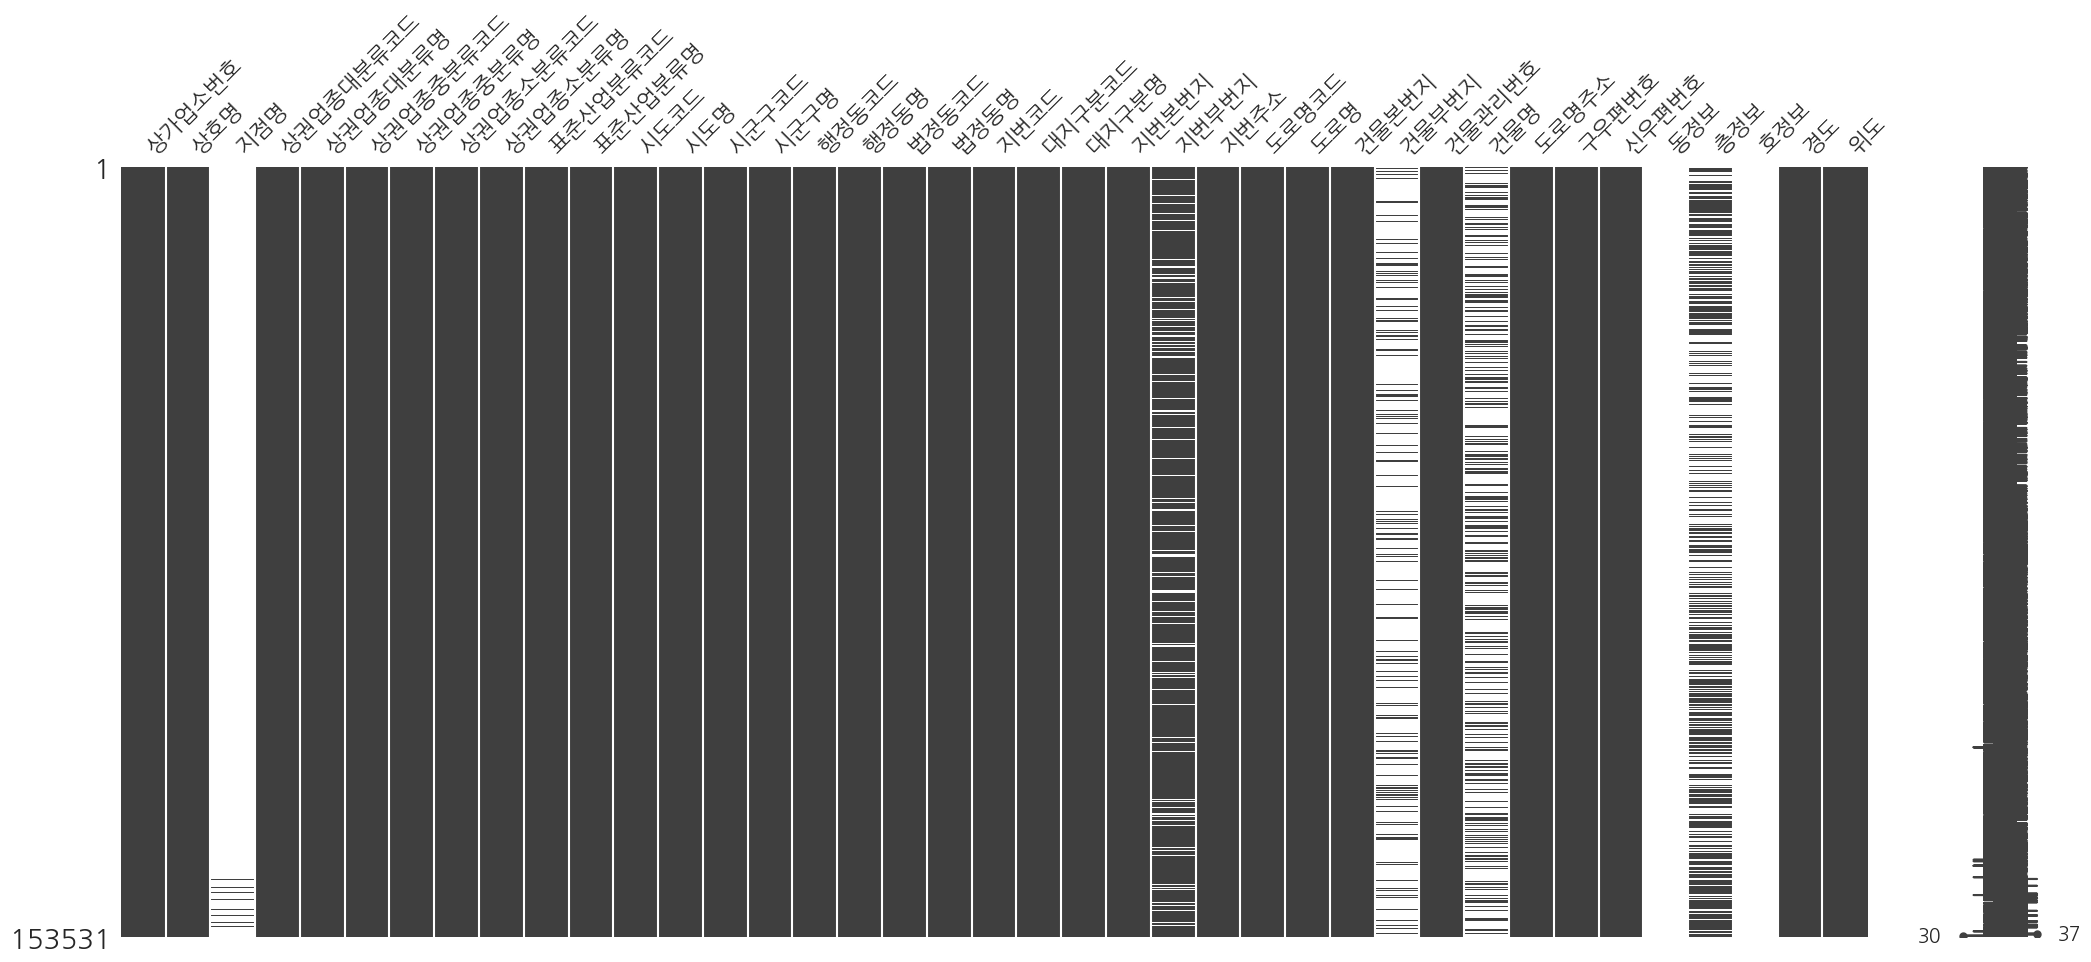

In [73]:
import missingno as msno

msno.matrix(shop)       # 결측치 시각화.
plt.show()

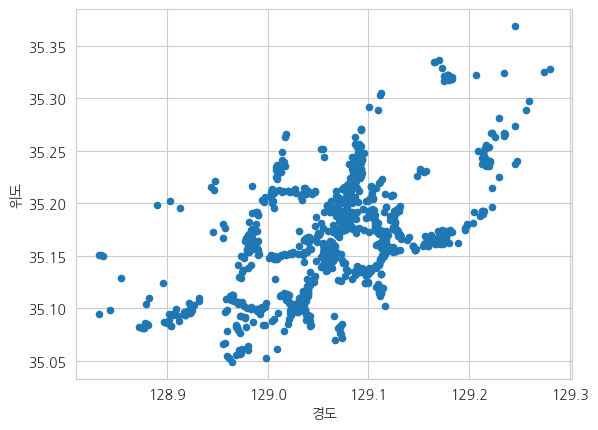

In [74]:
# Pandas 의 plot 으로 위도와 경도를 산점도
shop[:1000].plot.scatter(x='경도', y='위도', grid=True)
plt.show()

<Axes: xlabel='경도', ylabel='위도'>

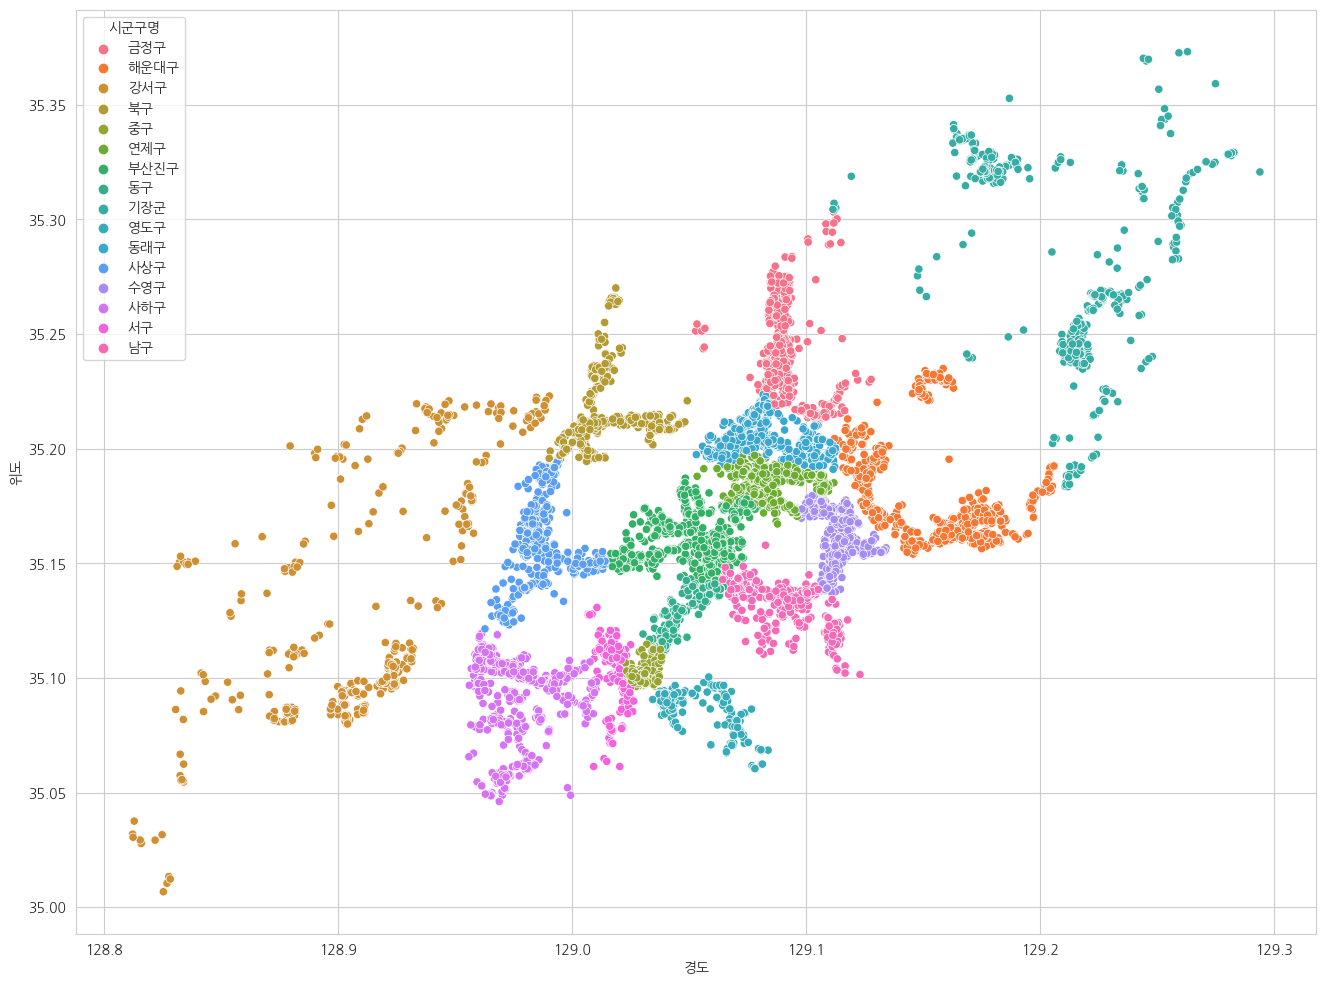

In [75]:
plt.figure(figsize=(16, 12))    # 지도 크기 지정 
sns.scatterplot(data=shop[:10000], x='경도', y='위도', hue='시군구명')     # 색조 = 시군구명

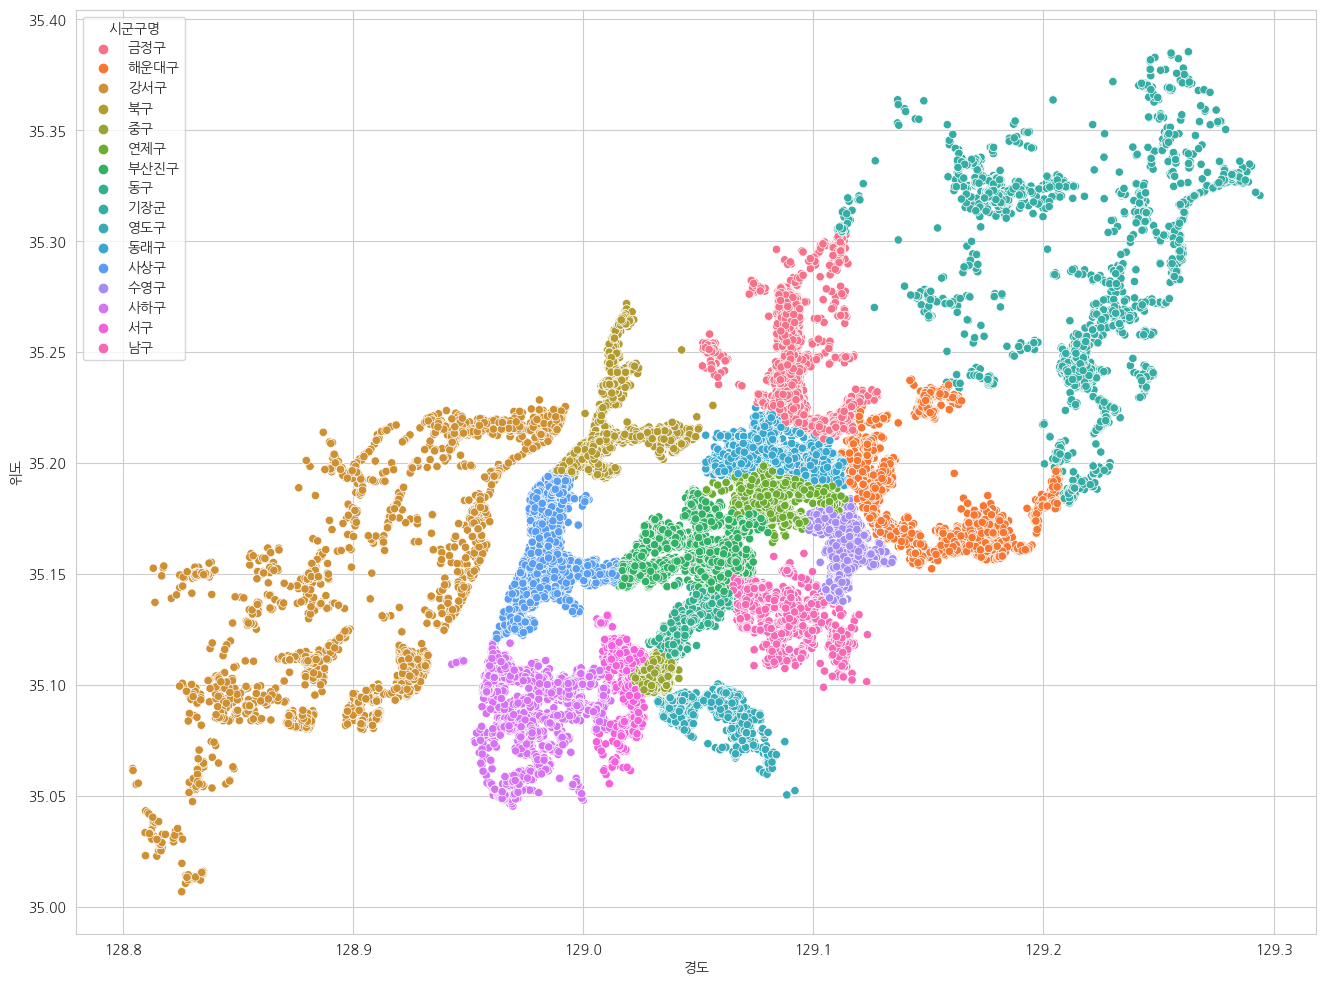

In [76]:
plt.figure(figsize=(16, 12))    # 지도 크기 지정 
sns.scatterplot(data=shop, x='경도', y='위도', hue='시군구명')     # 색조 = 시군구명

plt.show()

In [77]:
shop['상권업종대분류명'].value_counts()      # 종류

음식         54993
소매         39398
수리·개인      19068
과학·기술      12230
교육          6276
부동산         6086
예술·스포츠      5916
시설관리·임대     5314
숙박          2293
보건의료        1957
Name: 상권업종대분류명, dtype: int64

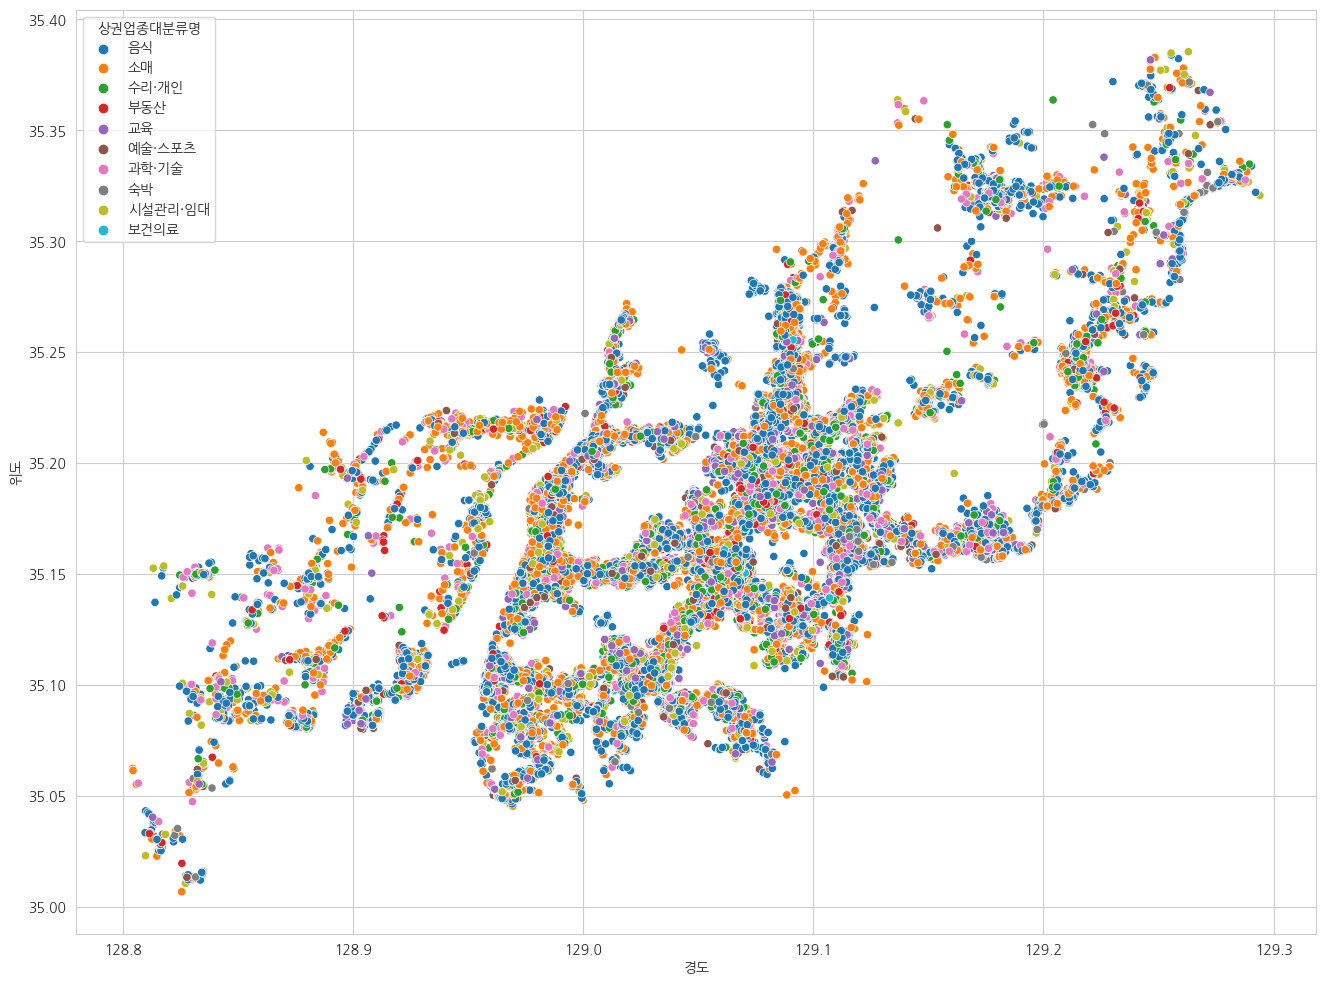

In [78]:
plt.figure(figsize=(16, 12))       # 지도 크기
sns.scatterplot(data=shop, x='경도', y='위도', hue='상권업종대분류명')

plt.show()

##### 상권업종대분류명 - 교육과 관련된 정보 보기

In [79]:
shop_busan_edu = shop[shop['상권업종대분류명'] == '교육']     #교육
shop_busan_edu.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
153495,MA0101202307A0034059,코드코치,NaN,P1,교육,P107,교육 지원,P10799,기타 교육지원 서비스업,P85709,...,2638010200105340001000597,벽산으뜸아파트,부산광역시 사하구 다대로22번길 30,604717,49416,NaN,2,NaN,129,35
153496,MA0101202307A0046622,대세키즈태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,2647010200112990011003082,NaN,부산광역시 연제구 월드컵대로165번길 57,611839,47541,NaN,2,NaN,129,35
153502,MA0101202307A0104466,기무태권도,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,2629011100100400010028439,참사랑한의원,부산광역시 남구 석포로 48,608800,48540,NaN,3,NaN,129,35
153525,MA0101202307A0080210,소향서예교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,2614010300101910003003725,NaN,부산광역시 서구 구덕로 342,602812,49211,NaN,3,NaN,129,35
153529,MA0101202307A0060093,히어로드림에프씨,NaN,P1,교육,P106,기타 교육,P10603,요가/필라테스 학원,P85612,...,2629010600117940001000001,대교마트,부산광역시 남구 진남로 115-7,608819,48454,NaN,3,NaN,129,35


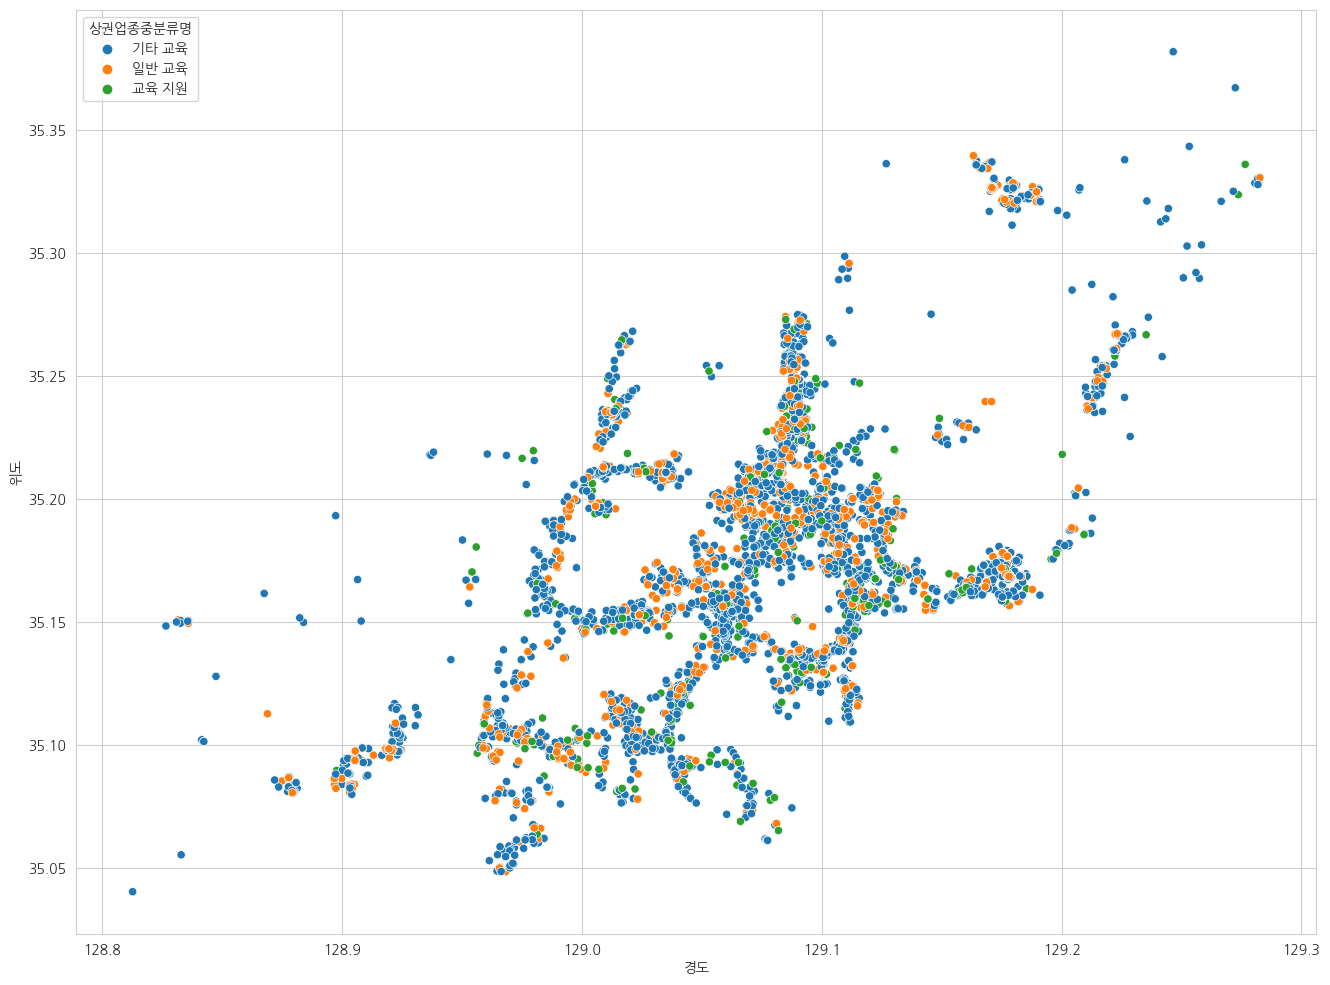

In [80]:
plt.figure(figsize=(16, 12))      # 지도크기
sns.scatterplot(data=shop_busan_edu, x='경도', y='위도', hue='상권업종중분류명')

plt.show()

##### 부동산과 관련된 정보 보기

In [81]:
shop_busan_property = shop[shop['상권업종대분류명'] == '부동산']     # 부동산

In [82]:
shop_busan_property.count()

상가업소번호       6086
상호명          6086
지점명             8
상권업종대분류코드    6086
상권업종대분류명     6086
상권업종중분류코드    6086
상권업종중분류명     6086
상권업종소분류코드    6086
상권업종소분류명     6086
표준산업분류코드     6086
표준산업분류명      6086
시도코드         6086
시도명          6086
시군구코드        6086
시군구명         6086
행정동코드        6086
행정동명         6086
법정동코드        6086
법정동명         6086
지번코드         6086
대지구분코드       6086
대지구분명        6086
지번본번지        6086
지번부번지        5446
지번주소         6086
도로명코드        6086
도로명          6086
건물본번지        6086
건물부번지         874
건물관리번호       6086
건물명          1935
도로명주소        6086
구우편번호        6086
신우편번호        6086
동정보             0
층정보          3311
호정보             0
경도           6086
위도           6086
dtype: int64

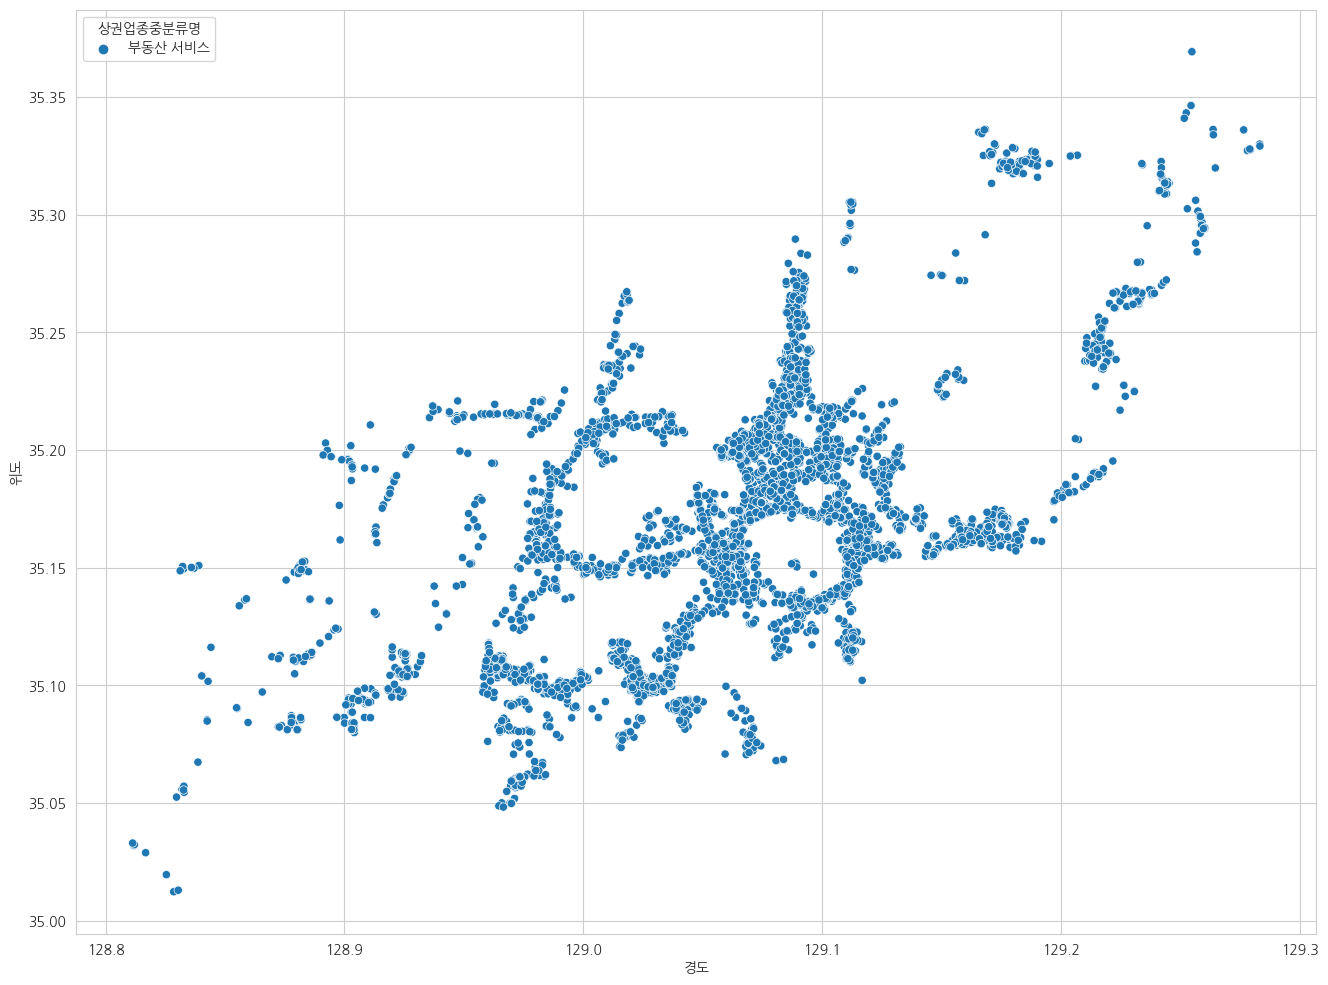

In [83]:
plt.figure(figsize=(16, 12))      # 지도크기
sns.scatterplot(data=shop_busan_property, x='경도', y='위도', hue='상권업종중분류명')

plt.show()

In [84]:
shop_bs_comedu = shop.loc[shop['상권업종소분류명'] == '컴퓨터 학원']
shop_bs_comedu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 534 to 152965
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     44 non-null     object 
 1   상호명        44 non-null     object 
 2   지점명        0 non-null      object 
 3   상권업종대분류코드  44 non-null     object 
 4   상권업종대분류명   44 non-null     object 
 5   상권업종중분류코드  44 non-null     object 
 6   상권업종중분류명   44 non-null     object 
 7   상권업종소분류코드  44 non-null     object 
 8   상권업종소분류명   44 non-null     object 
 9   표준산업분류코드   44 non-null     object 
 10  표준산업분류명    44 non-null     object 
 11  시도코드       44 non-null     int64  
 12  시도명        44 non-null     object 
 13  시군구코드      44 non-null     int64  
 14  시군구명       44 non-null     object 
 15  행정동코드      44 non-null     int64  
 16  행정동명       44 non-null     object 
 17  법정동코드      44 non-null     int64  
 18  법정동명       44 non-null     object 
 19  지번코드       44 non-null     int64  
 20  대지구분코드

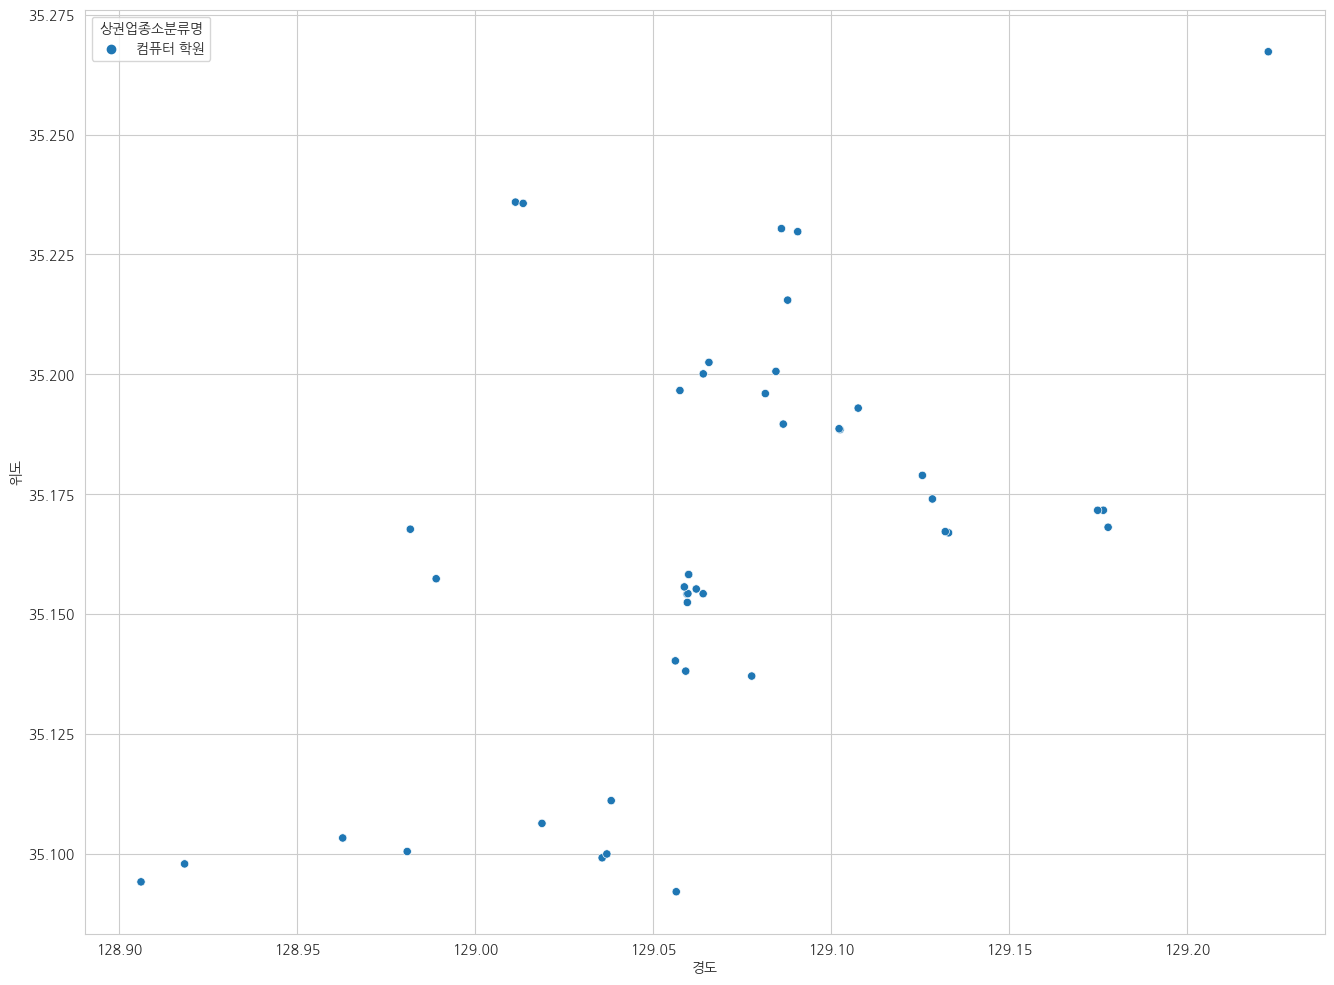

In [85]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_bs_comedu, x='경도', y='위도', hue='상권업종소분류명')      # 0: transparent,  1: opaque

plt.show()

In [86]:
import folium

def show_marker_map(geo_df):
    map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],         # 위도와 경도의 평균값으로 지도(Map)의 중심값 잡아줌.
                     zoom_start=12, tiles='Stamen Terrain')                           # 지도를 12 만큼 확대, tiles style 적용
    
    for n in geo_df.index:
        shop_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']     # 위치를 누르면 팝업창으로 뜨는 이름
        folium.Marker([geo_df.loc[n, '위도'],         # location
                       geo_df.loc[n, '경도']],        
                      popup=shop_name).add_to(map)    # popup창 설정

    return map

In [87]:
shop_bs_comedu.index     # index

Int64Index([   534,   1045,   3851,   4502,   6399,   7212,   9603,  11550,
             11798,  13196,  23238,  23353,  25310,  26638,  33272,  42135,
             42872,  43018,  50584,  54165,  62469,  85118,  87259,  91941,
             95881,  99171,  99797, 105740, 106355, 110229, 112514, 118891,
            119511, 124822, 128303, 142032, 145722, 146059, 146619, 147348,
            149630, 151628, 152518, 152965],
           dtype='int64')

In [88]:
show_marker_map(shop_bs_comedu)

###### 부산외 지역도 해보기

- 상권정보 공공데이터 포털
    - 서울의 경우 압축 푼 csv 파일이 200메가가 넘어감. Github 업로드 불가